<a href="https://colab.research.google.com/github/Janashruthi-B/yolov5_brain_tumor_detection/blob/main/yolov5_brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 16582 (delta 30), reused 39 (delta 19), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.11 MiB | 8.50 MiB/s, done.
Resolving deltas: 100% (11383/11383), done.


In [ ]:
%cd yolov5
%pip install -qr requirements.txt  # install
%pip install -q roboflow

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.4 M

In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

In [ ]:
#create folder
os.environ["DATASET_DIRECTORY"]="/content/drive/MyDrive/btdata3"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t8N4QsdHyhtAhhUcv03S")
project = rf.workspace("kidney-d2eqe").project("btd02")
version = project.version(3)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cat {dataset.location}/data.yaml

names:
- glioma
- meningioma
- no_tumor
- pituitary
nc: 4
roboflow:
  license: CC BY 4.0
  project: btd02
  url: https://universe.roboflow.com/kidney-d2eqe/btd02/dataset/3
  version: 3
  workspace: kidney-d2eqe
test: ../test/images
train: /content/drive/MyDrive/btdata3/btd02-3/train/images
val: /content/drive/MyDrive/btdata3/btd02-3/valid/images


In [ ]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 40 --data {dataset.location}/data.yaml --weights /content/yolov5s.pt --name yolov5s_results  --cache

/content/yolov5
2024-05-05 17:52:34.646302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 17:52:34.646365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 17:52:34.647911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5s.pt, cfg=, data=/content/drive/MyDrive/btdata3/btd02-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_wei

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.2 --source /content/drive/MyDrive/btdata3/btd02-3/valid/images

detect: weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/btdata3/btd02-3/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/659 /content/drive/MyDrive/btdata3/btd02-3/valid/images/Te-gl_0014_jpg.rf.0a8e5ca3d96f6bbb4b786a962303cb16.jpg: 416x416 1 glioma, 7.1ms
image 2/659 /content/drive/MyDrive/btdata3/btd02-3/valid/images/Te-gl_0015_jpg.rf.936d55c7813c05ebd01bcf161c9aaeb1.jpg: 416x41

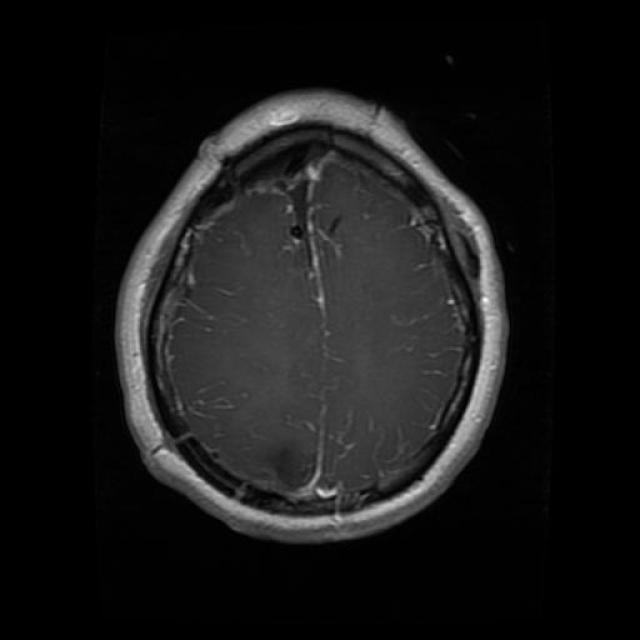

/n


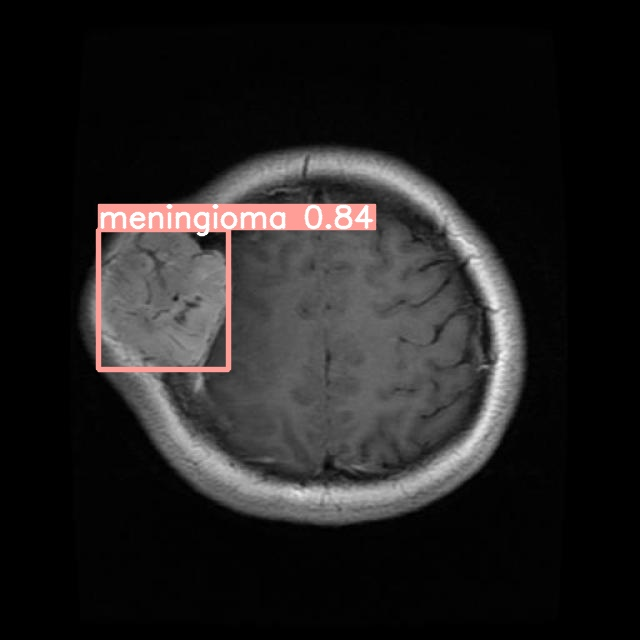

/n


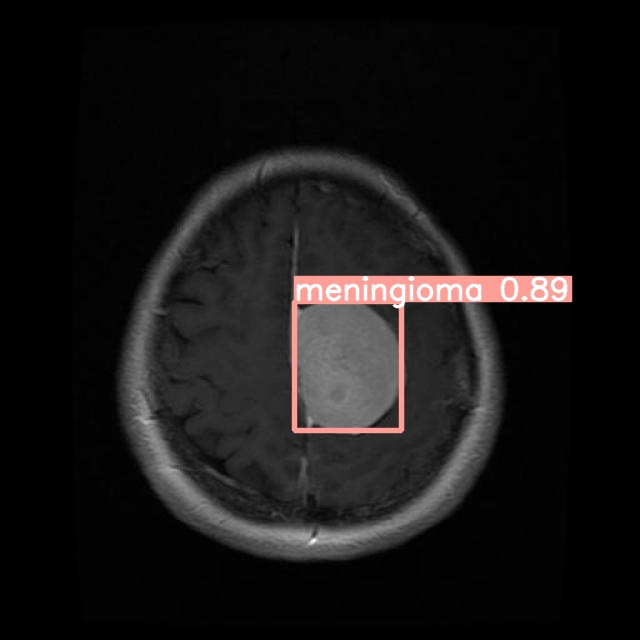

/n


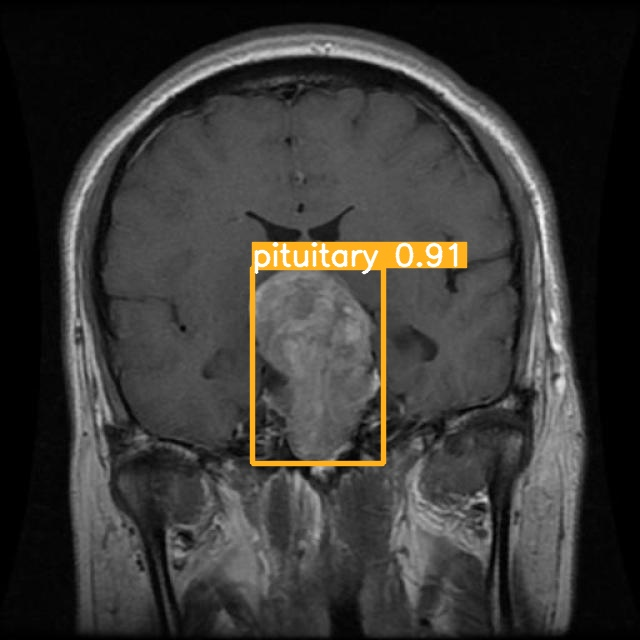

/n


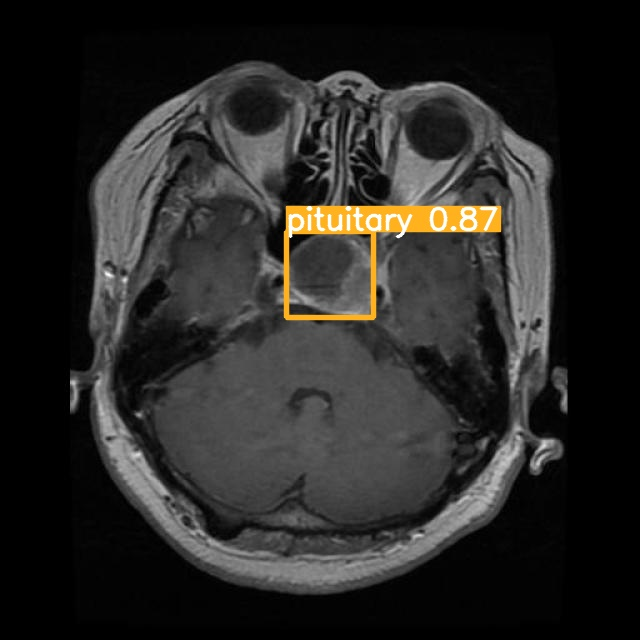

/n


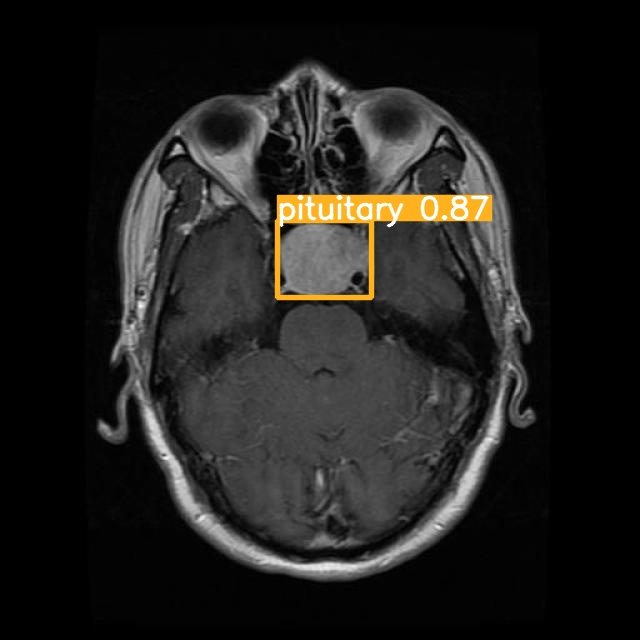

/n


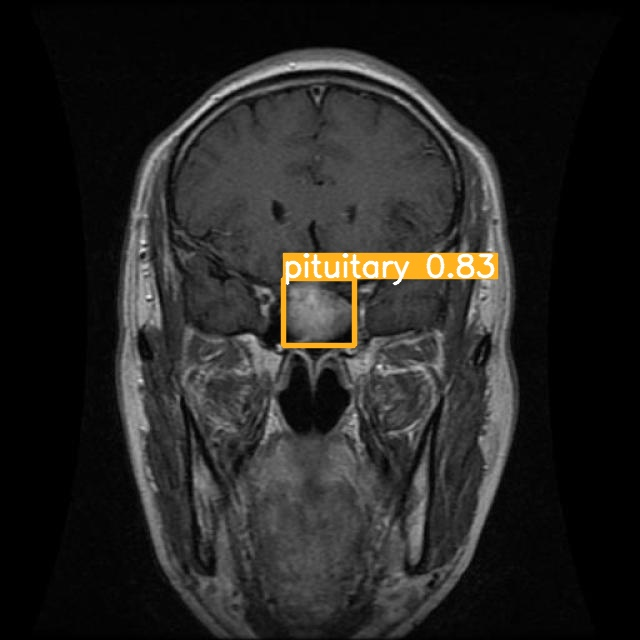

/n


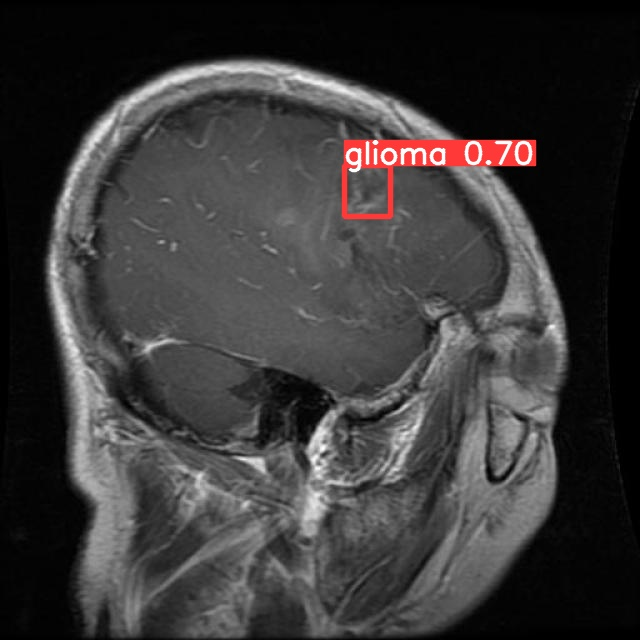

/n


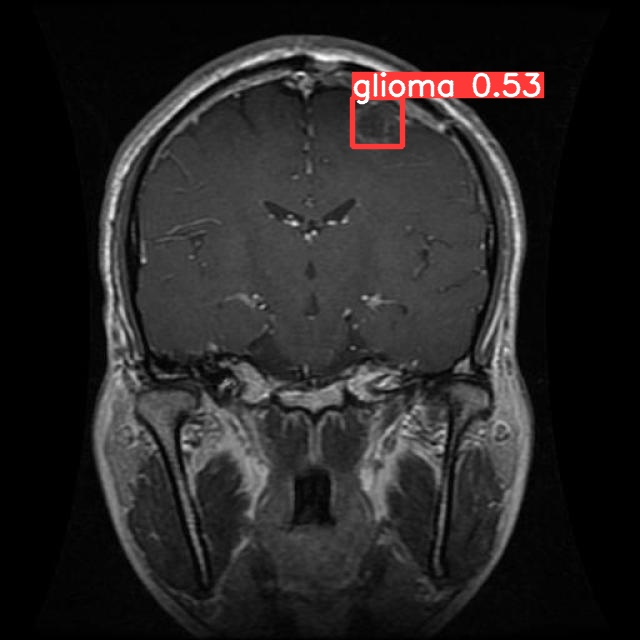

/n


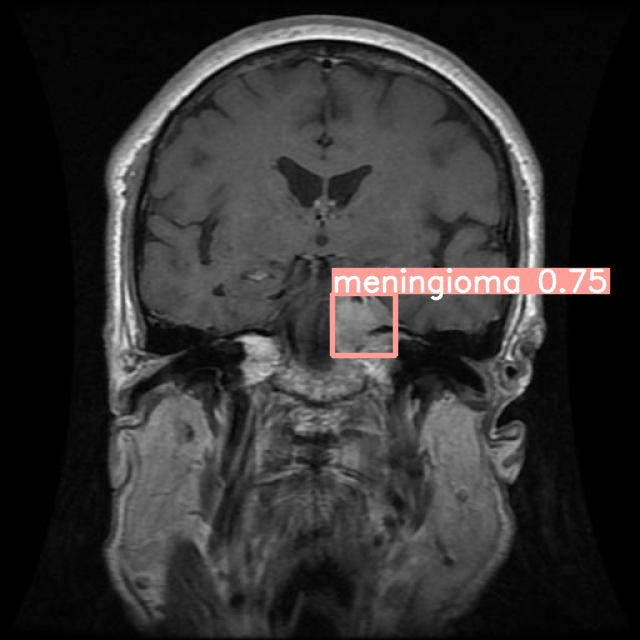

/n


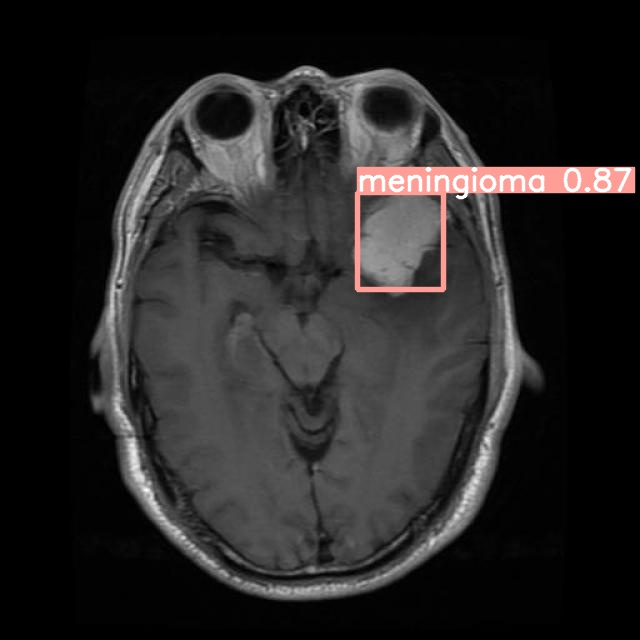

/n


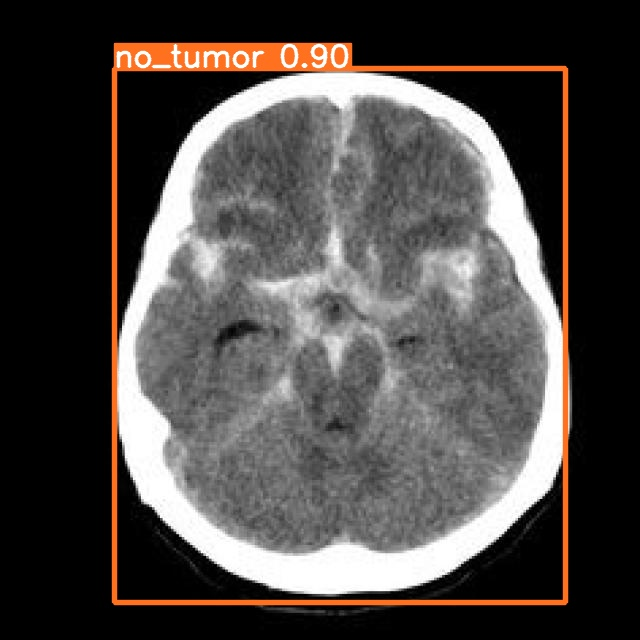

/n


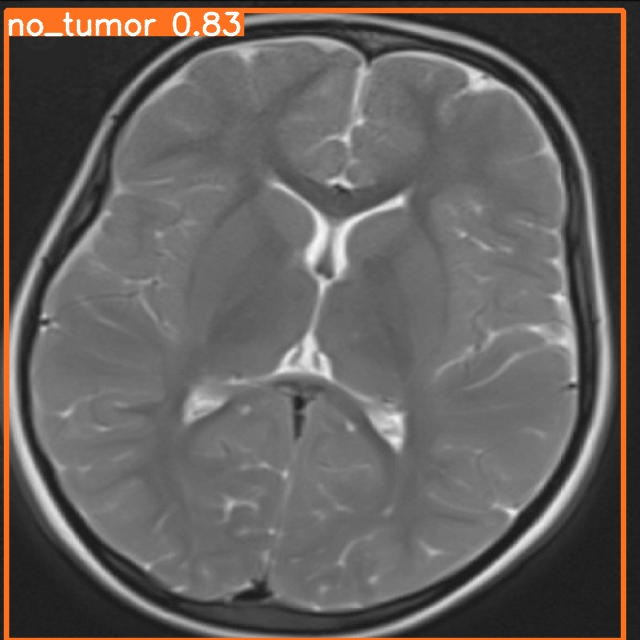

/n


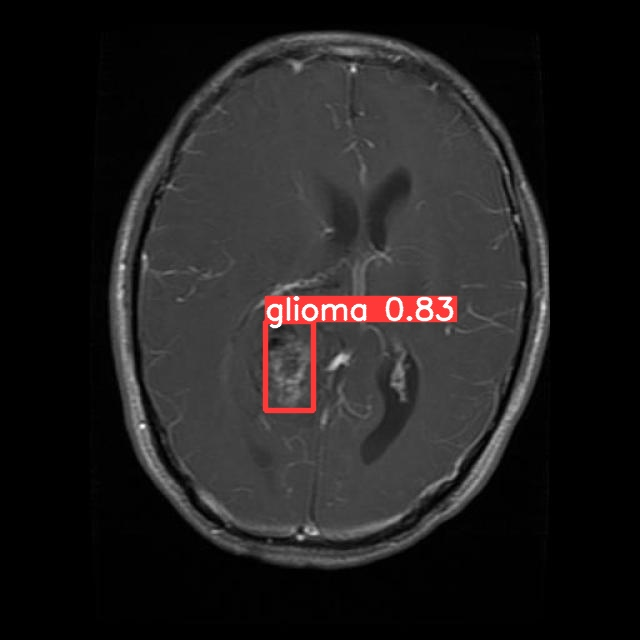

/n


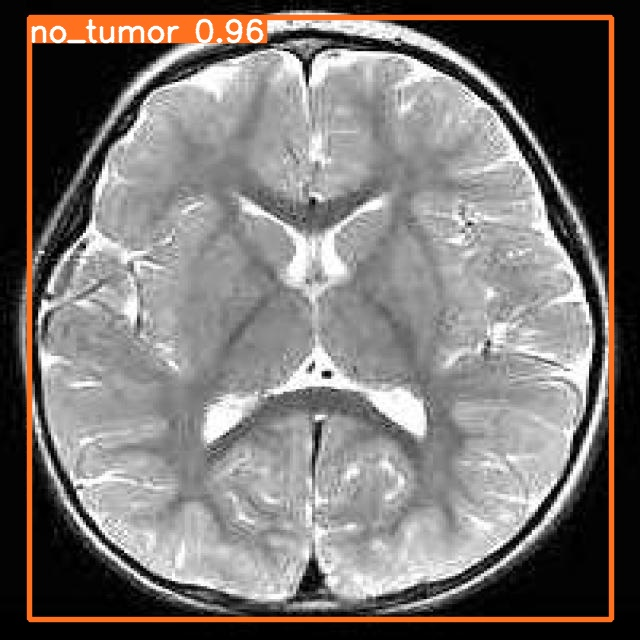

/n


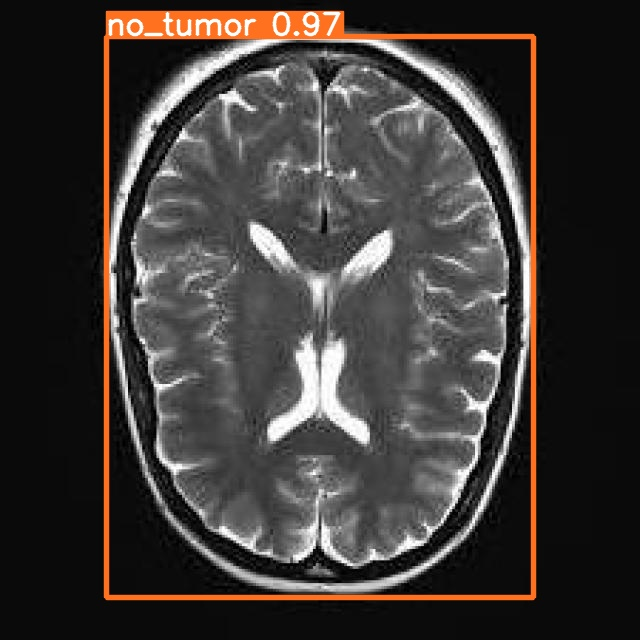

/n


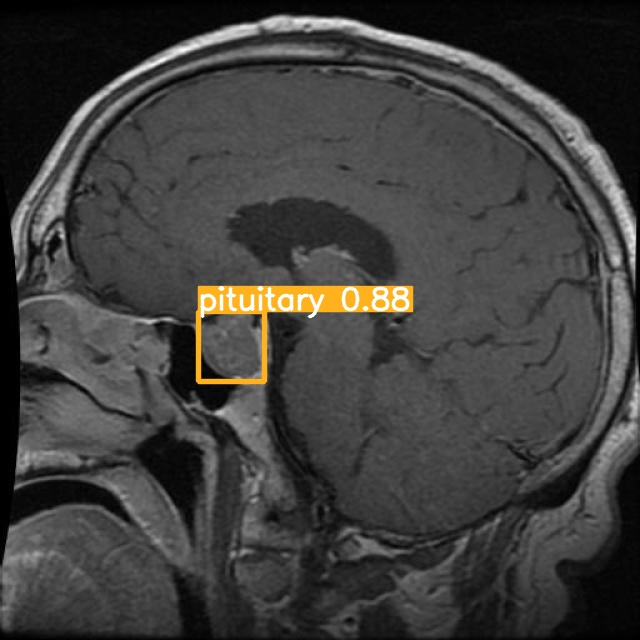

/n


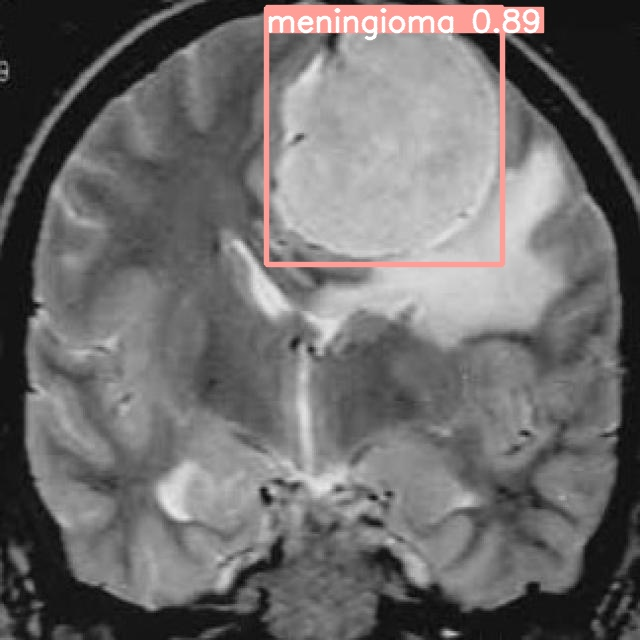

/n


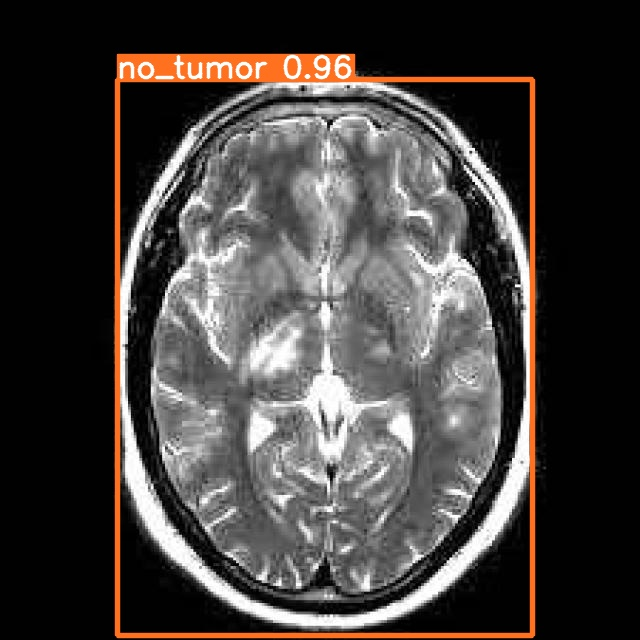

/n


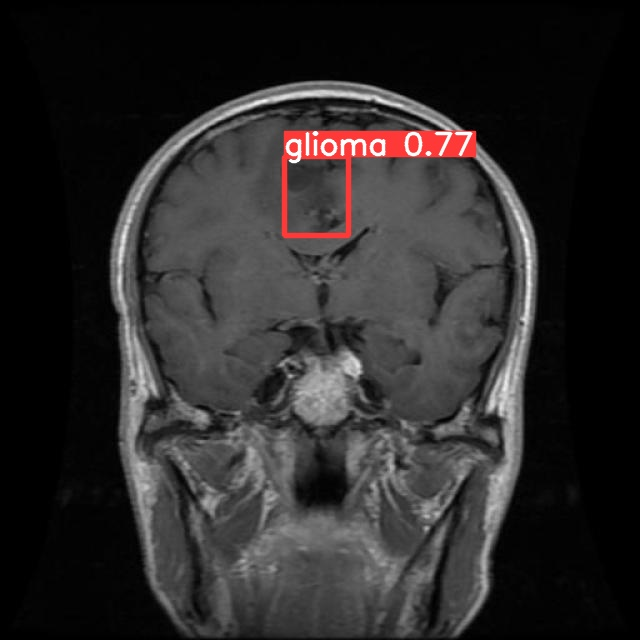

/n


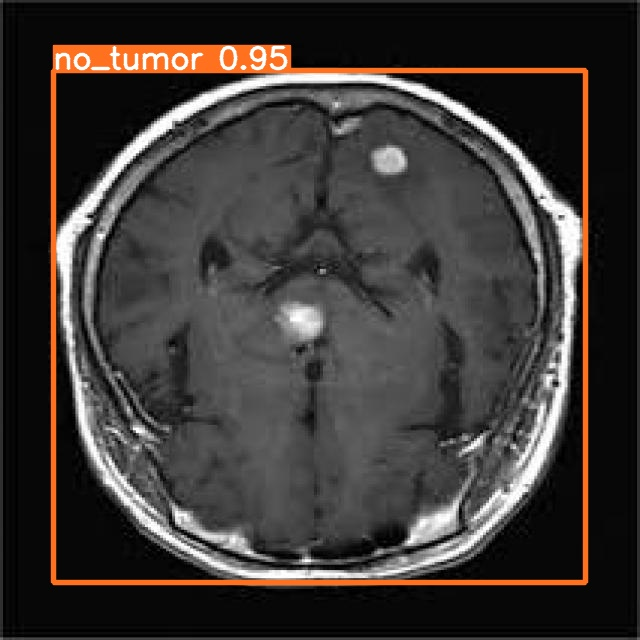

/n


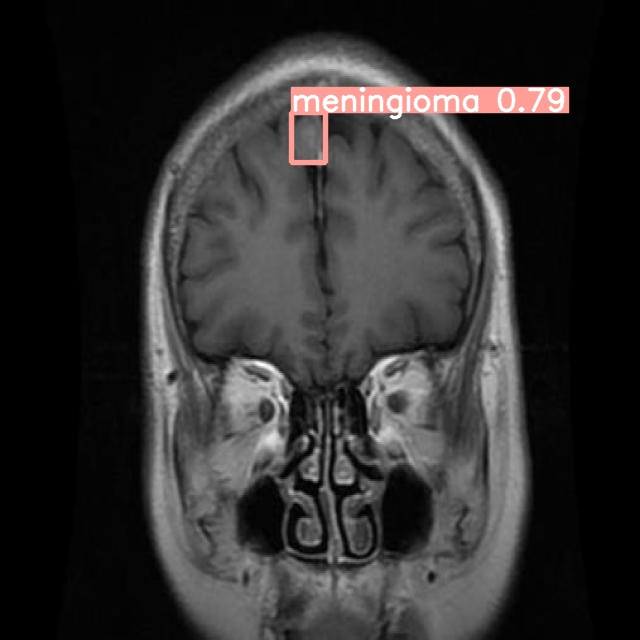

/n


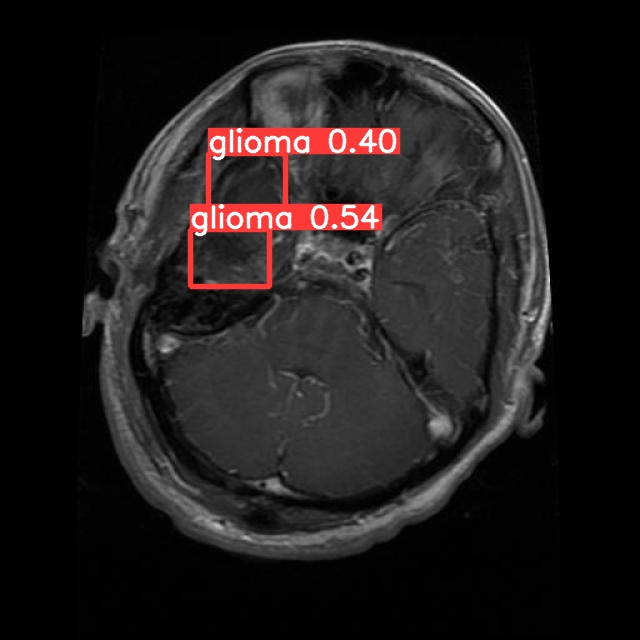

/n


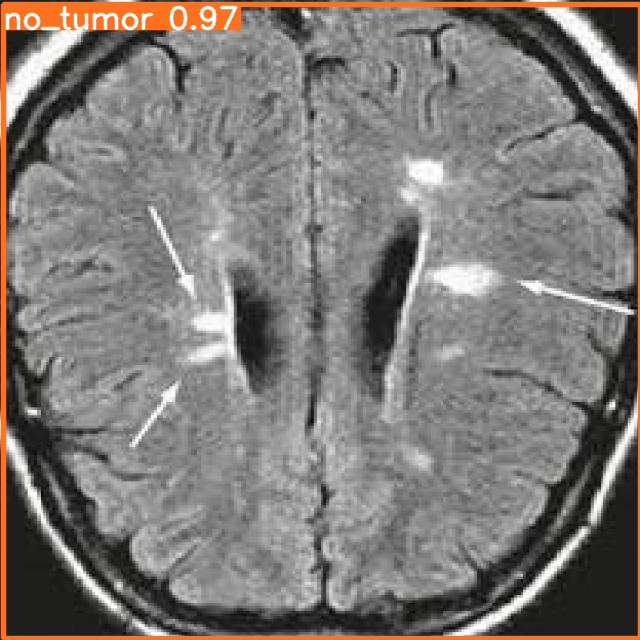

/n


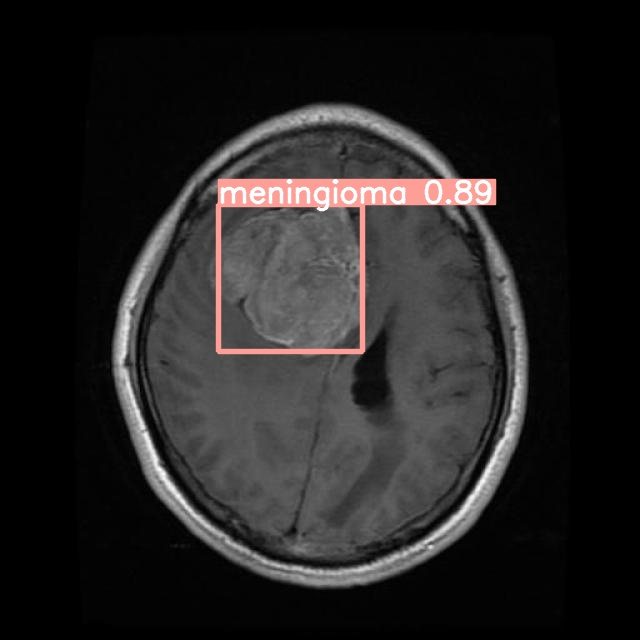

/n


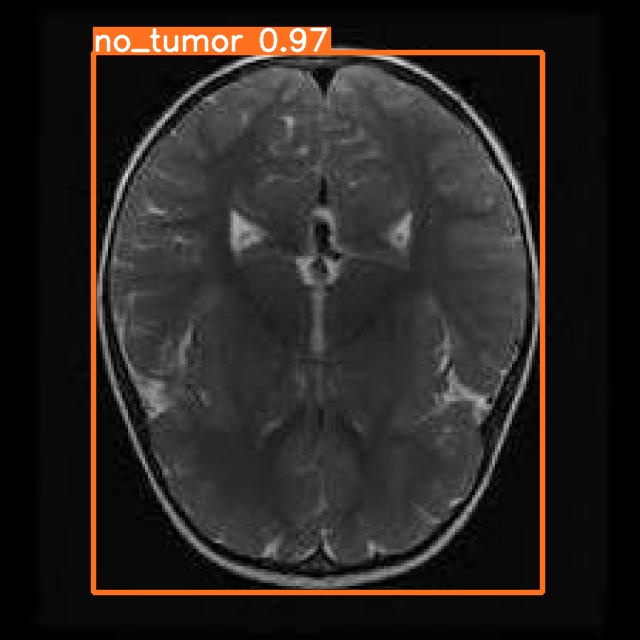

/n


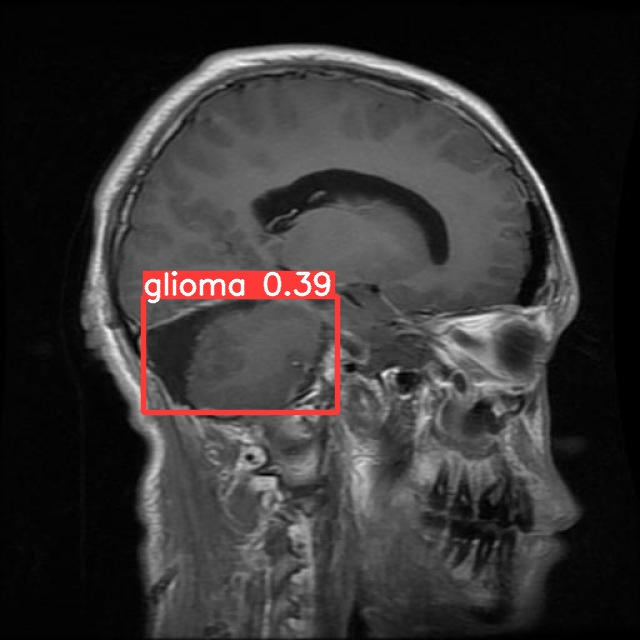

/n


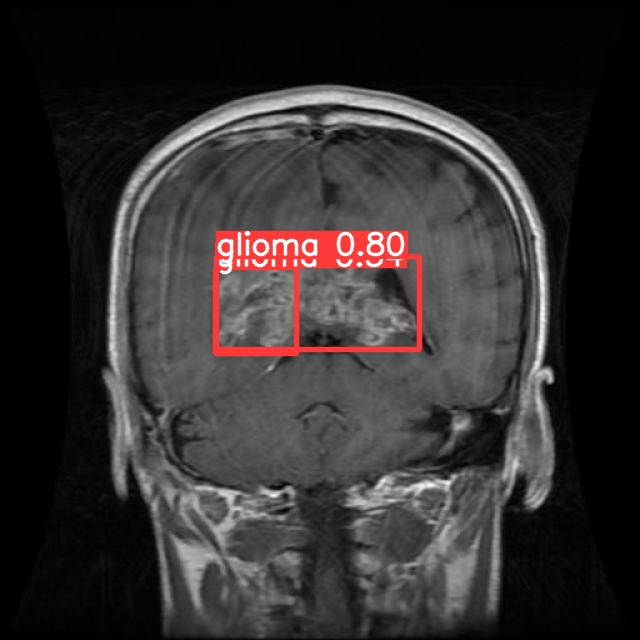

/n


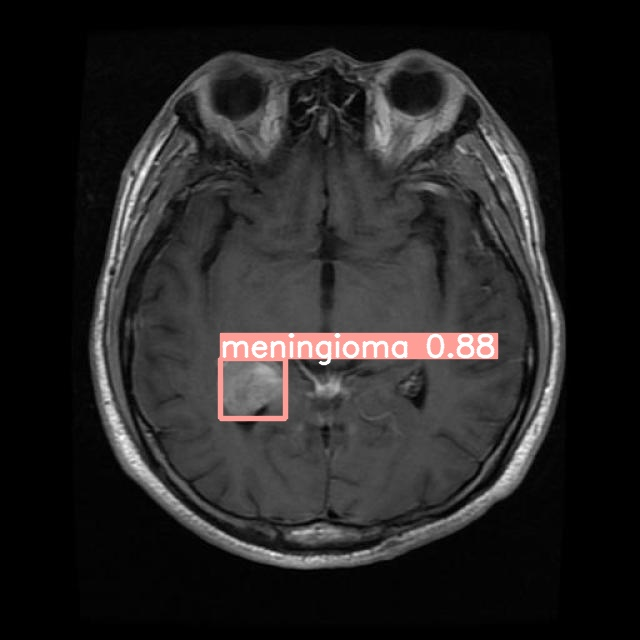

/n


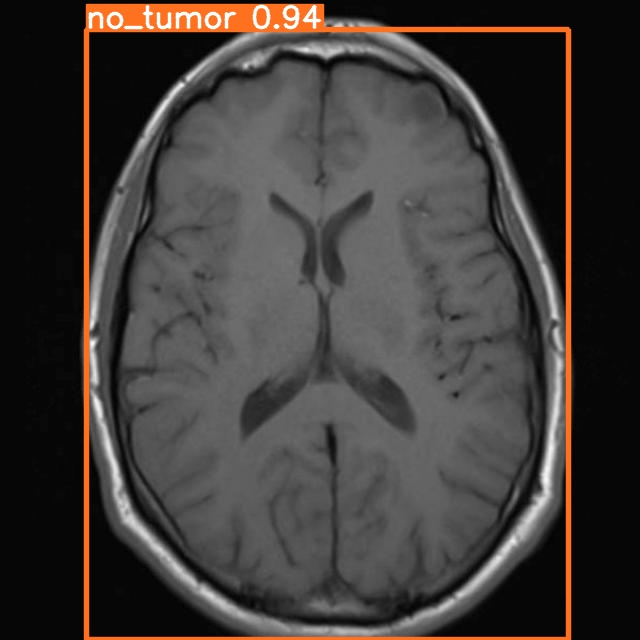

/n


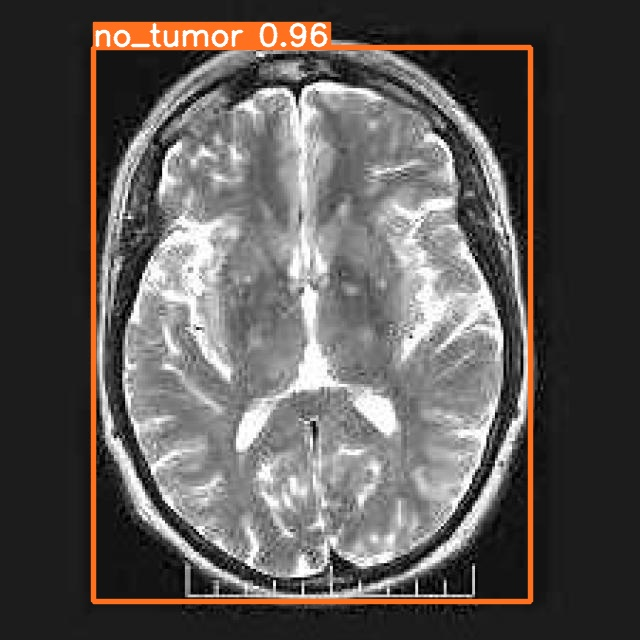

/n


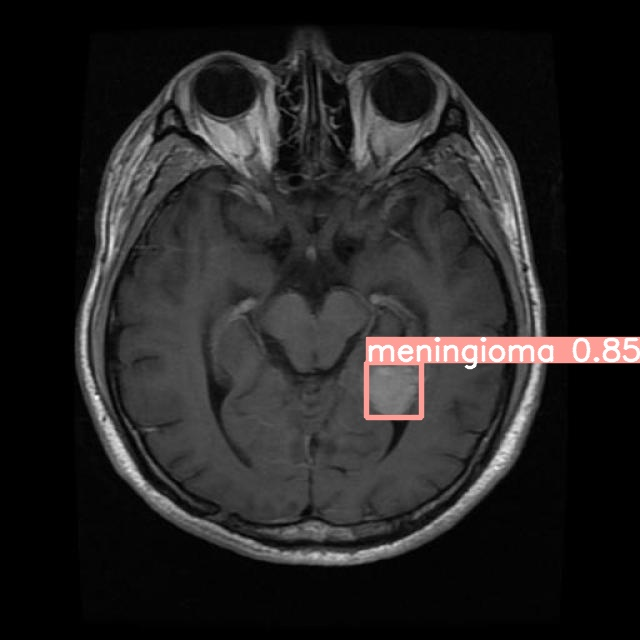

/n


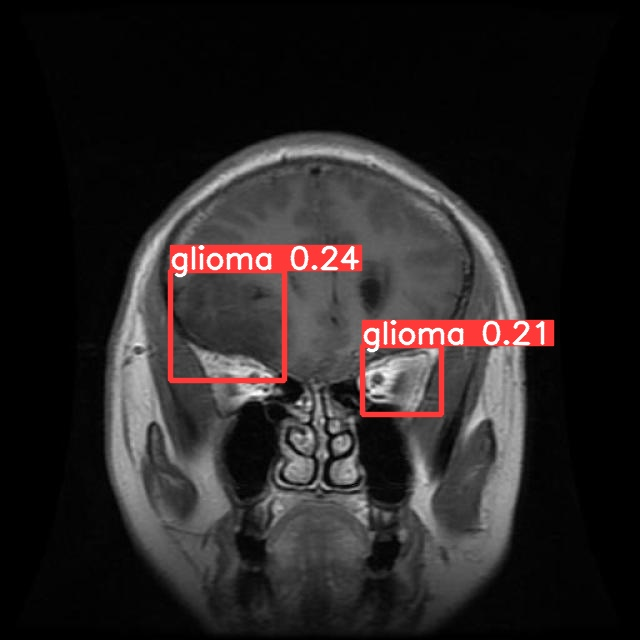

/n


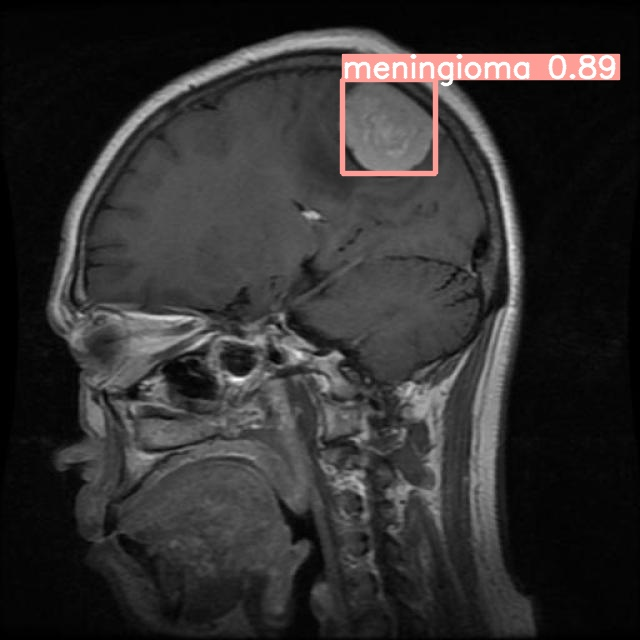

/n


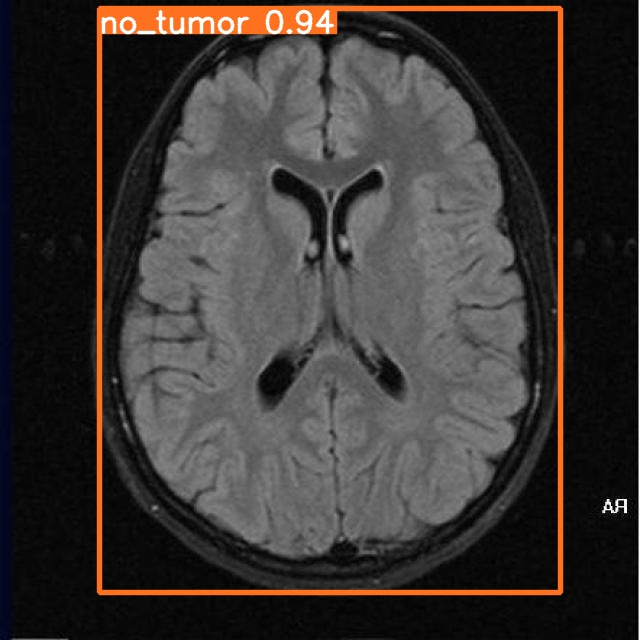

/n


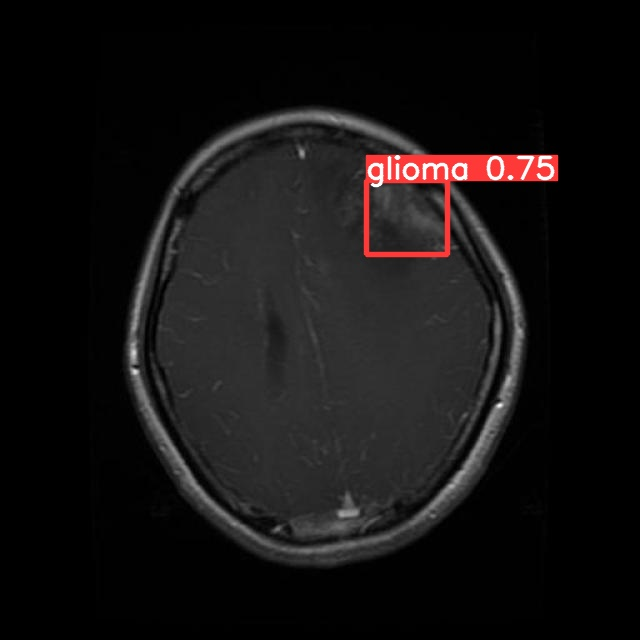

/n


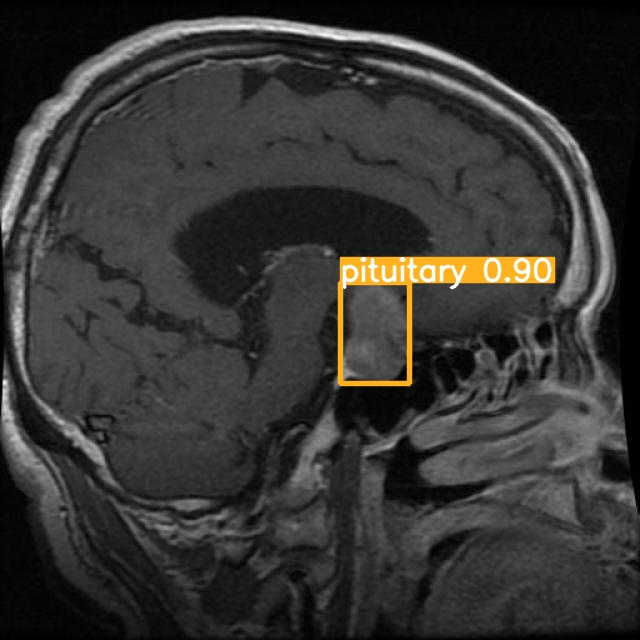

/n


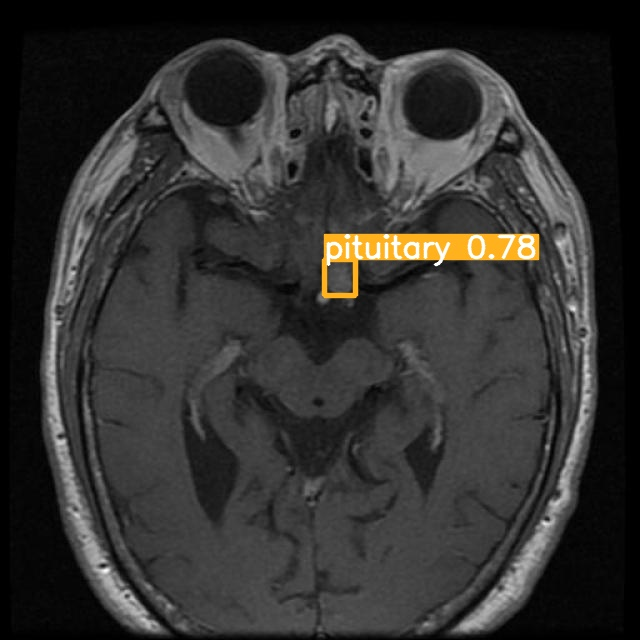

/n


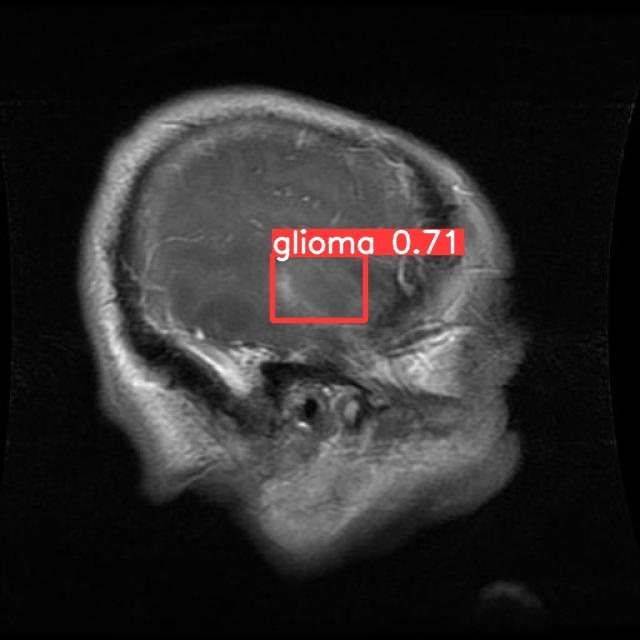

/n


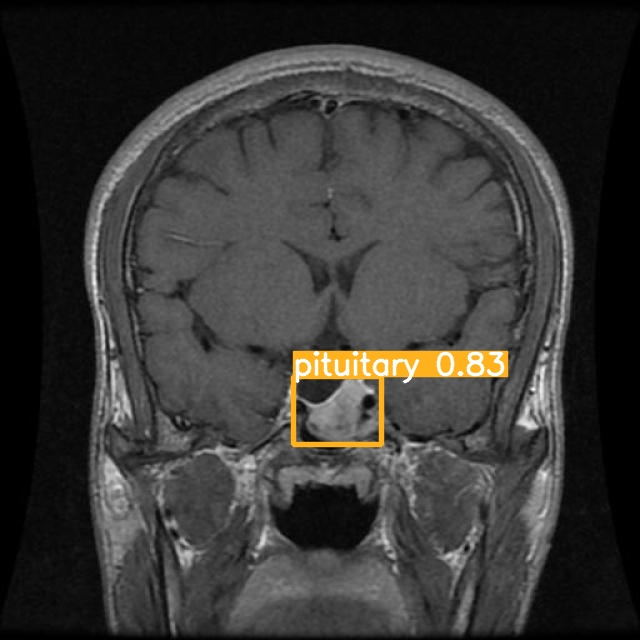

/n


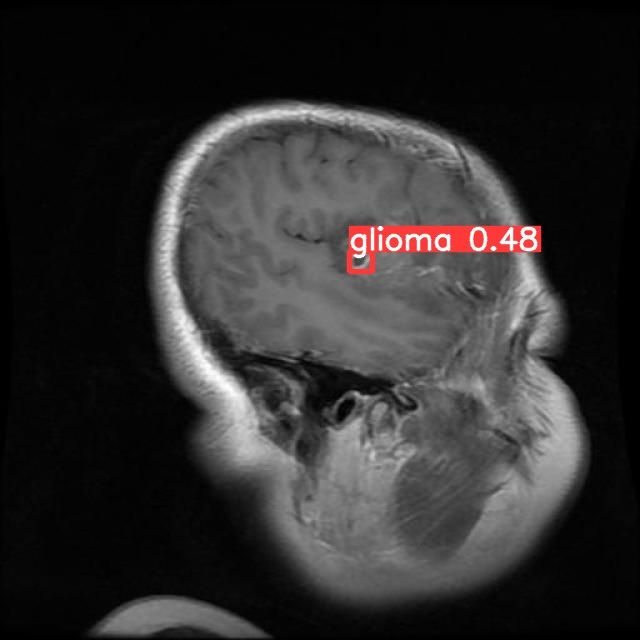

/n


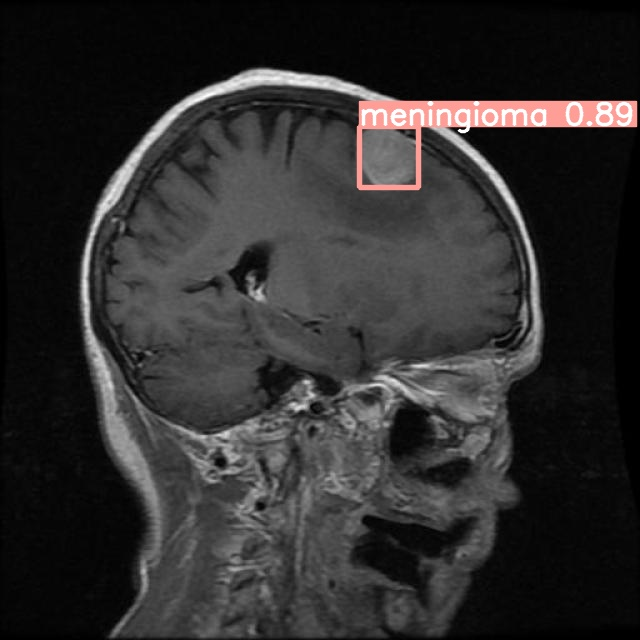

/n


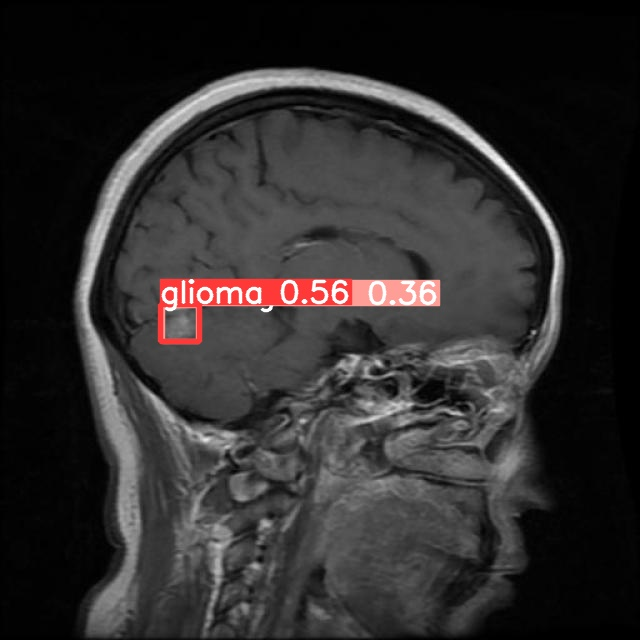

/n


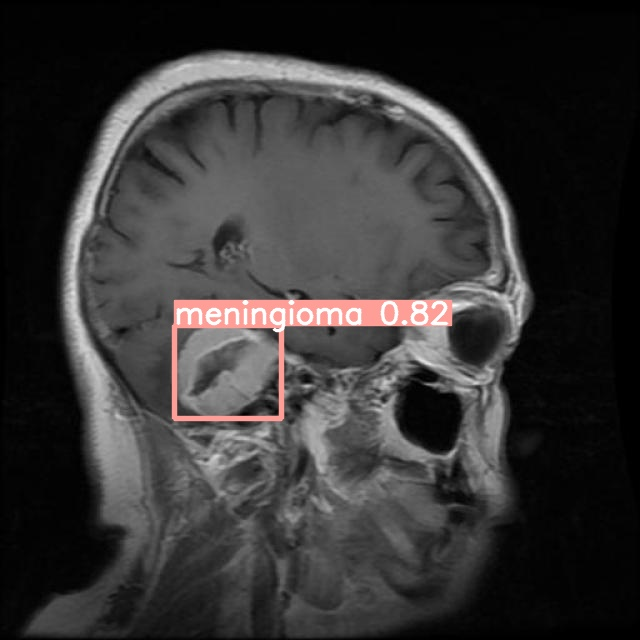

/n


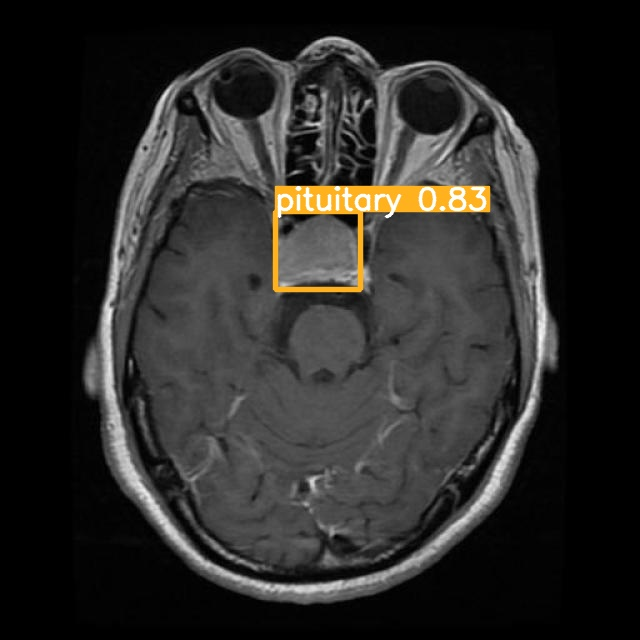

/n


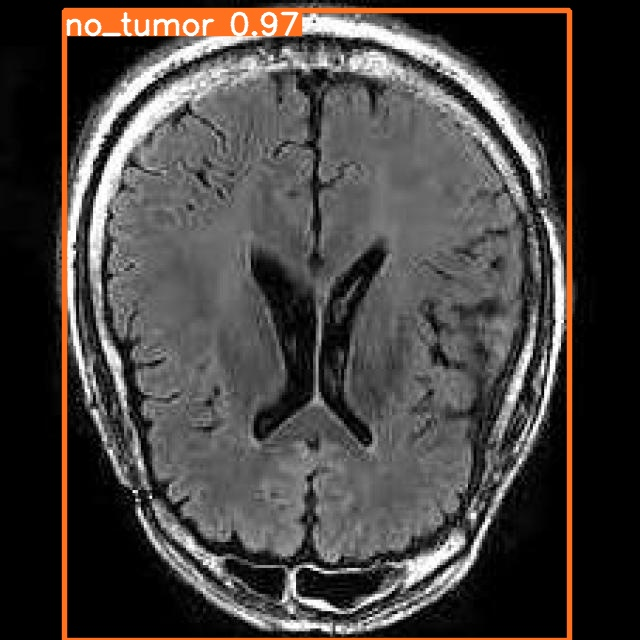

/n


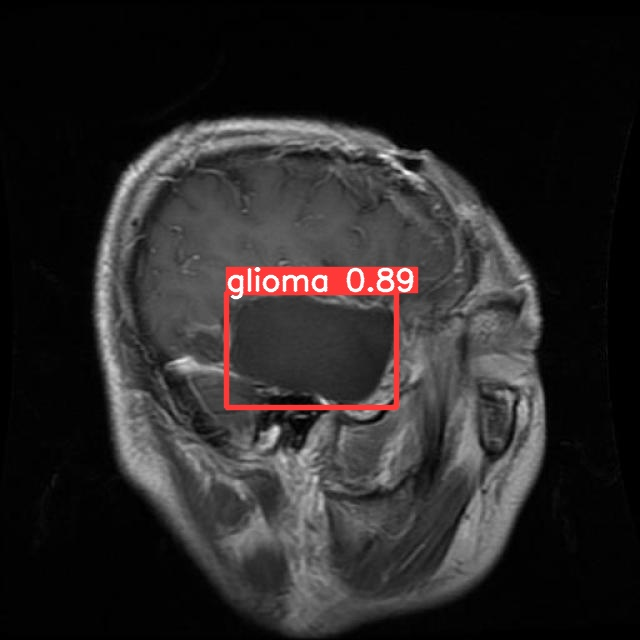

/n


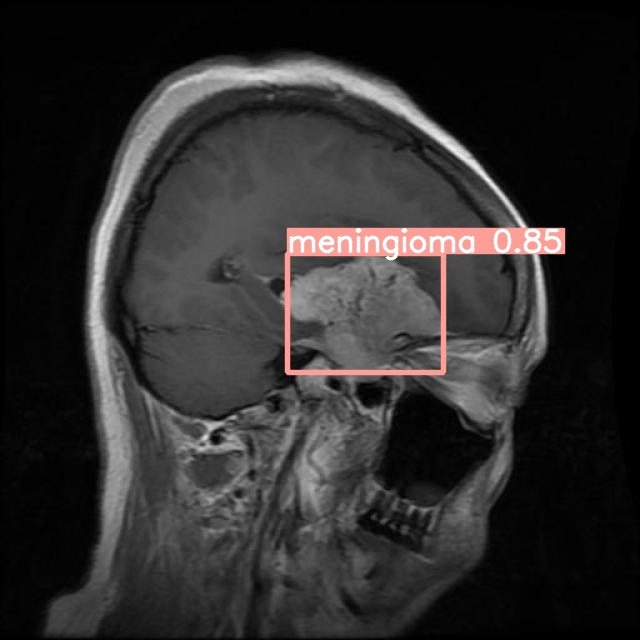

/n


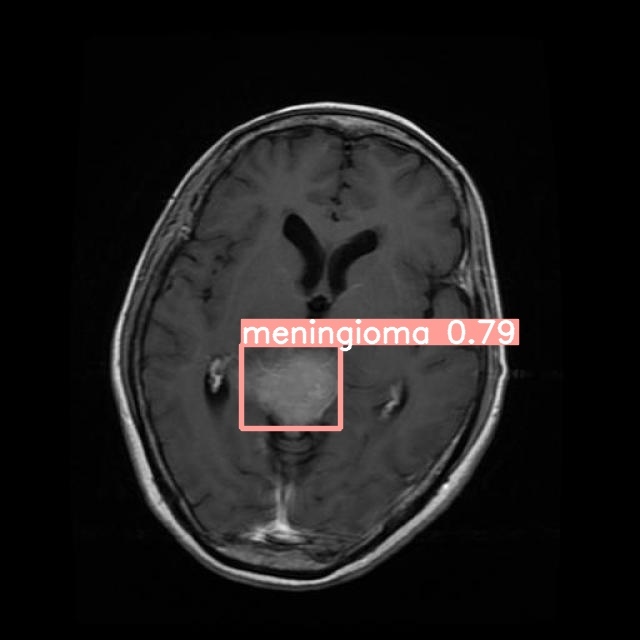

/n


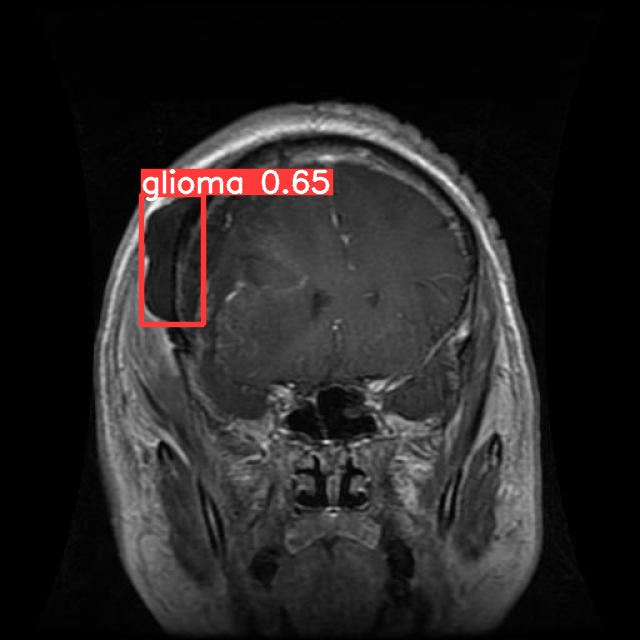

/n


In [ ]:
import glob
from IPython.display import Image, display
i=0
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  i+=1
  if i<=50:
    display(Image(filename=imageName))
    print("/n")

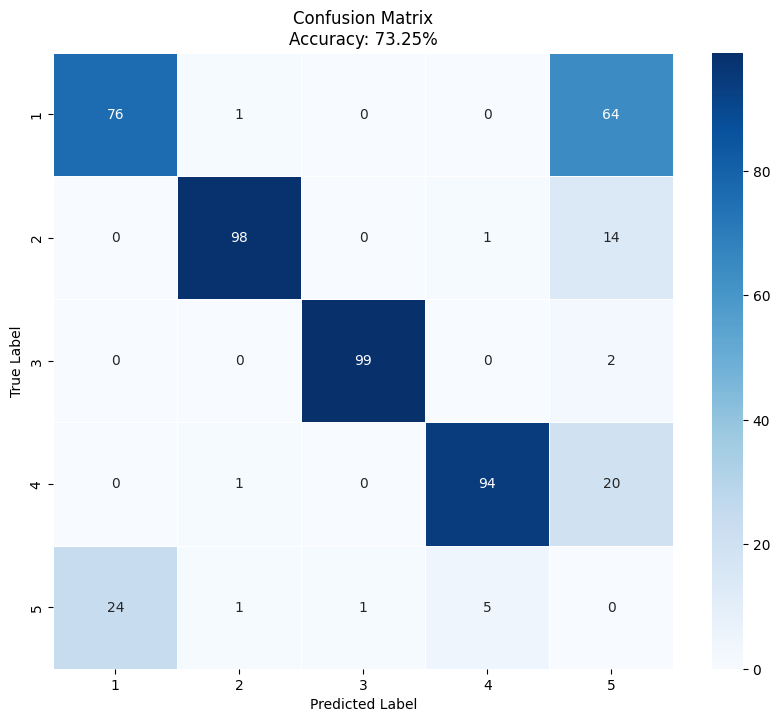

73.25349301397206


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace this with your actual confusion matrix)
conf_matrix = np.array([[76, 1, 0, 0, 64],
                        [0, 98, 0, 1, 14],
                        [0, 0, 99, 0, 2],
                        [0, 1, 0, 94, 20],
                        [24, 1, 1, 5, 0]])

# Calculate accuracy percentage
total_samples = np.sum(conf_matrix)
correct_predictions = np.trace(conf_matrix)
accuracy_percentage = (correct_predictions / total_samples) * 100

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, 6), columns=range(1, 6))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, cmap="Blues", fmt='d', linewidths=.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()
print(accuracy_percentage)

In [ ]:
# Calculate precision and recall for each class
precision = np.zeros(conf_matrix.shape[0])
recall = np.zeros(conf_matrix.shape[0])

for i in range(conf_matrix.shape[0]):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    precision[i] = true_positives / (true_positives + false_positives)
    recall[i] = true_positives / (true_positives + false_negatives)

# Convert precision and recall to DataFrame for better visualization
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall}, index=range(1, 6))

# Display precision and recall for each class
print("Precision and Recall for each class:")
print(metrics_df)


Precision and Recall for each class:
   Precision    Recall
1   0.760000  0.539007
2   0.970297  0.867257
3   0.990000  0.980198
4   0.940000  0.817391
5   0.000000  0.000000
